In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('..')

from src.features_engineering import features_engineering

In [2]:
from pathlib import Path

ROOT = Path('..').resolve()

In [3]:
df = pd.read_csv(ROOT / 'data' / 'csi300_pollution_df.csv', index_col='Date', parse_dates=True)

df = features_engineering(df)

In [4]:
df

,Close,Volume,returns,realized_vol,pm25,pm10,vix,usdcnh,pm25_lag1,pm25_lag2,pm25_lag3,pm25_lag4,pm25_lag5,pm25_ma5,pm25_ma20,pm25_vol5,pm25_vol20,pm25_std,rvol_lag1,rvol_lag2
Date,,,,,,,,,,,,,,,,,,,,
2014-12-10,3221.55,425020.0,0.036234,0.332353,199.0,39.0,18.53,6.1800,382.0,122.0,76.0,37.0,63.0,163.2,171.10,136.366051,121.128422,1.680731,0.318884,0.247972
2014-12-11,3183.01,367090.0,-0.012035,0.337299,72.0,42.0,20.08,6.1963,199.0,382.0,122.0,76.0,37.0,170.2,173.40,128.965887,118.639392,-0.549686,0.332353,0.318884
2014-12-12,3193.23,301070.0,0.003206,0.336378,51.0,57.0,21.08,6.1963,72.0,199.0,382.0,122.0,76.0,165.2,172.00,133.920499,119.969733,-0.918495,0.337299,0.332353
2014-12-15,3217.23,290190.0,0.007488,0.331275,130.0,31.0,20.42,6.1997,51.0,72.0,199.0,382.0,122.0,166.8,172.85,133.321791,119.589330,0.468930,0.336378,0.337299
2014-12-16,3303.40,358120.0,0.026432,0.325364,44.0,88.0,23.57,6.1928,130.0,51.0,72.0,199.0,382.0,99.2,171.40,65.228061,121.030836,-1.041432,0.331275,0.336378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-19,4568.18,154880.0,0.003375,0.121971,153.0,8.0,14.91,7.0337,201.0,154.0,97.0,130.0,71.0,147.0,95.35,38.046025,48.097790,0.872863,0.152433,0.152041
2025-12-22,4611.62,165250.0,0.009464,0.124929,117.0,36.0,14.08,7.0307,153.0,201.0,154.0,97.0,130.0,144.4,95.15,39.897368,47.993722,0.240619,0.121971,0.152433
2025-12-23,4620.73,169260.0,0.001973,0.121614,81.0,16.0,14.00,7.0190,117.0,153.0,201.0,154.0,97.0,141.2,95.45,44.968878,47.879756,-0.391625,0.124929,0.121971


In [5]:
figs = (24, 9)

# Exploratory Data Analysis

### 1. Distribution & Statistiques Descriptives
-  Distribution PM2.5 (histogram + KDE)
-  Distribution realized_vol
-  Boxplot PM2.5 par année (tendance de réduction post-2018)

### 2. Séries Temporelles
-  CSI 300 Close + PM2.5
-  Realized vol + PM2.5 sur le même axe
-  Rolling correlation PM2.5 vs realized_vol (fenêtre 90j)

### 3. Corrélations
-  Heatmap corrélation (pm25, realized_vol, vix, usdcnh, returns)
-  Scatter plot PM2.5 vs realized_vol (coloré par année)
-  Cross-Correlation Function (CCF) — PM2.5 vs realized_vol (lags 0 à 10j)

### 4. Saisonnalité
-  PM2.5 moyen par mois
-  Realized vol moyenne par mois

### 5. Régimes
-  High pollution (PM2.5 > 150) vs Low pollution — distribution de la vol

## I . Distributions and Descriptive Statistics

## II. Time Series

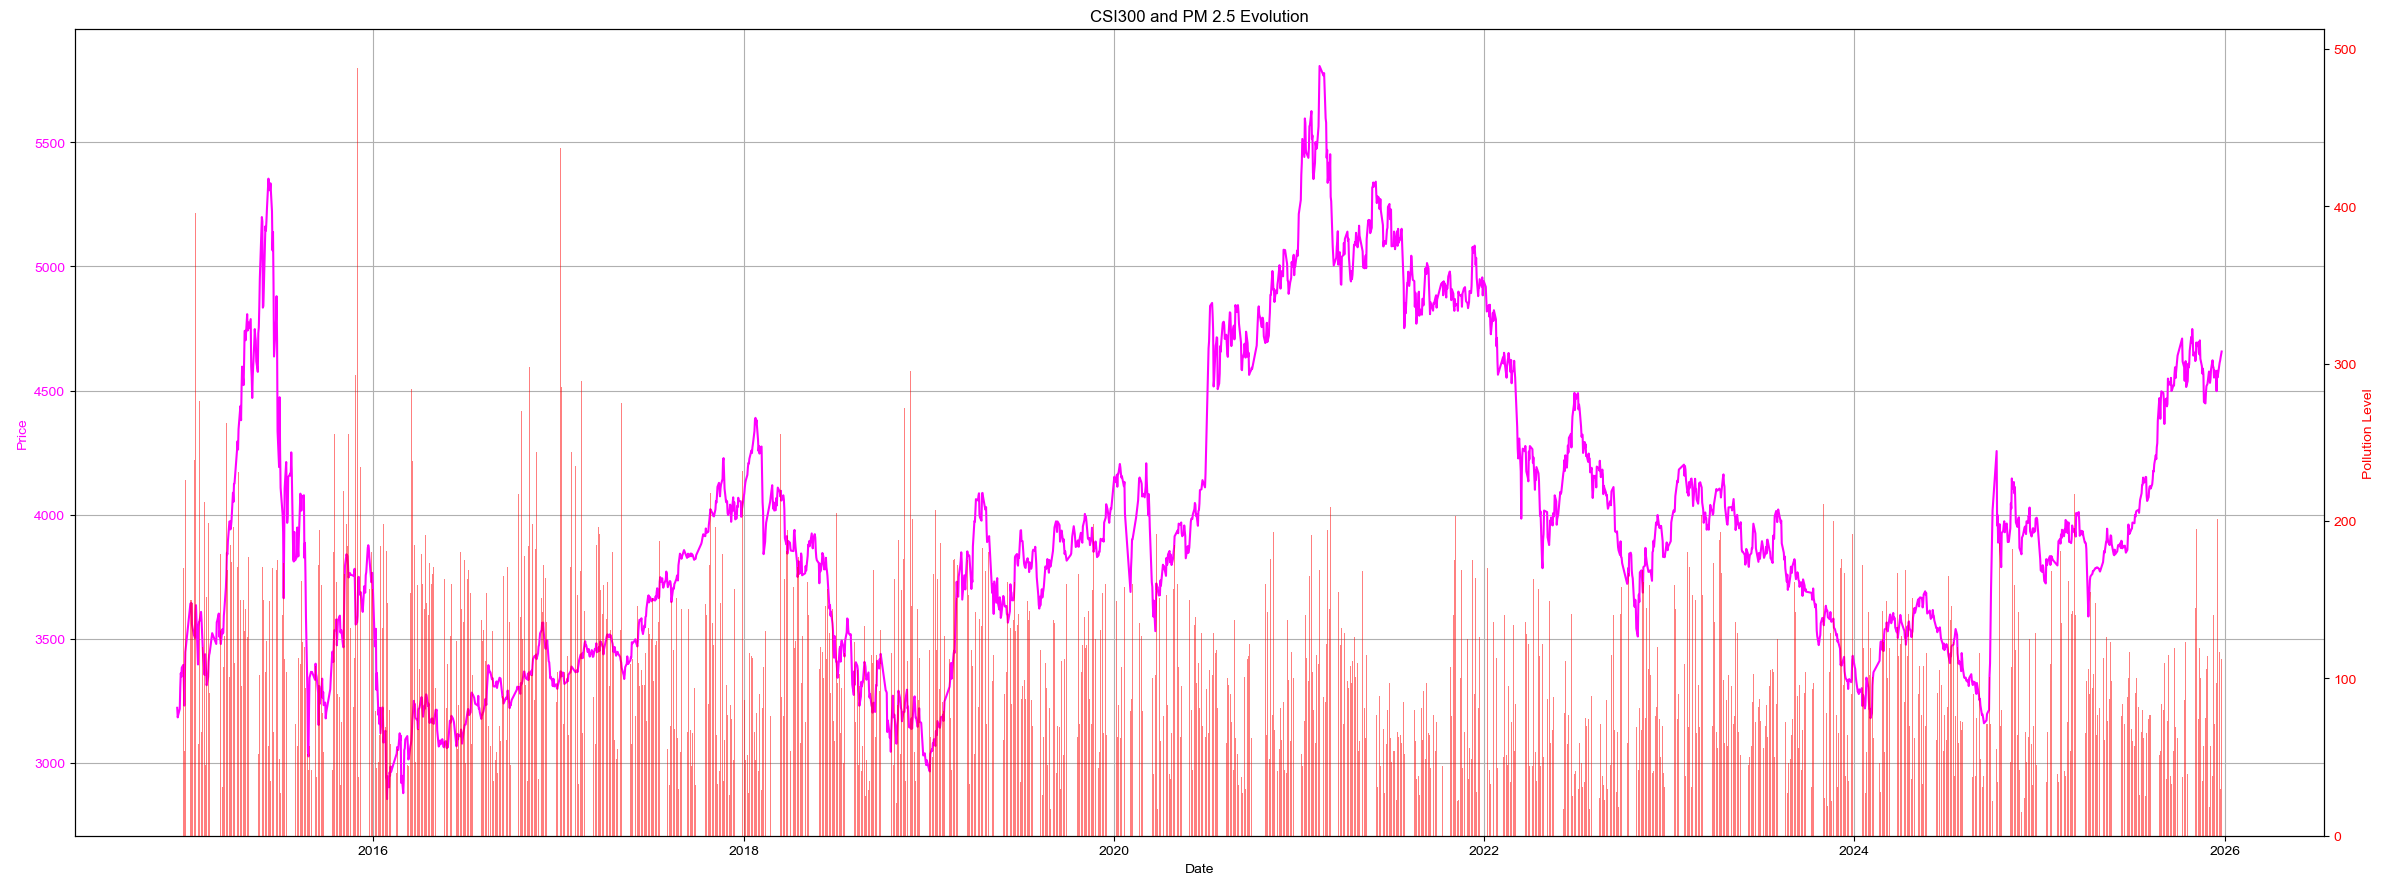

In [6]:
# 1. CSI 300 Close + PM2.5

fig, ax1 = plt.subplots(figsize=figs)

ax1.plot(df.index, df['Close'], label='CSI300', color='magenta')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='magenta')
ax1.tick_params(axis='y', labelcolor='magenta')
ax1.grid()

ax2 = ax1.twinx()
ax2.bar(df.index, df['pm25'], label='PM 2.5', color='red', alpha=0.5)
ax2.set_ylabel('Pollution Level', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('CSI300 and PM 2.5 Evolution')
plt.tight_layout()
plt.style.use('seaborn-v0_8-darkgrid')
plt.show();